In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [3]:
data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')


In [4]:
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])
data['SignupDate'] = pd.to_datetime(data['SignupDate'])

In [5]:
data['Month'] = data['TransactionDate'].dt.to_period('M')
data['Hour'] = data['TransactionDate'].dt.hour

In [6]:
##Customer Analysis

Unique Customers: 199


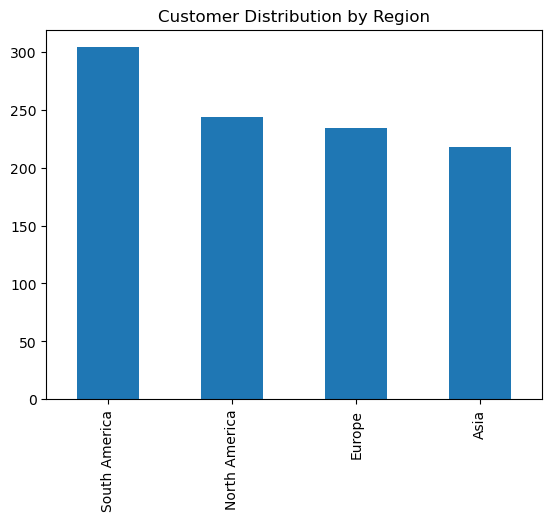

In [7]:
print("Unique Customers:", data['CustomerID'].nunique())
data['Region'].value_counts().plot(kind='bar', title='Customer Distribution by Region')
plt.show()

In [8]:
## 2. Product Analysis


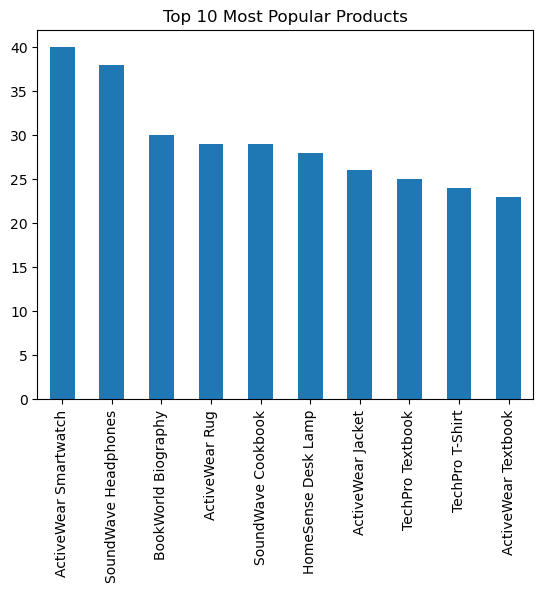

In [9]:
data['ProductName'].value_counts().head(10).plot(kind='bar', title='Top 10 Most Popular Products')
plt.show()

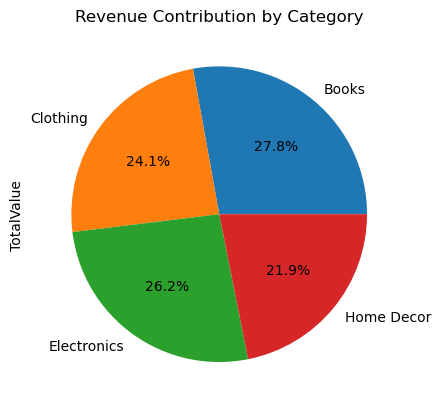

In [10]:
category_revenue = data.groupby('Category')['TotalValue'].sum()
category_revenue.plot(kind='pie', autopct='%1.1f%%', title='Revenue Contribution by Category')
plt.show()

In [11]:
## 3. Transaction Trends

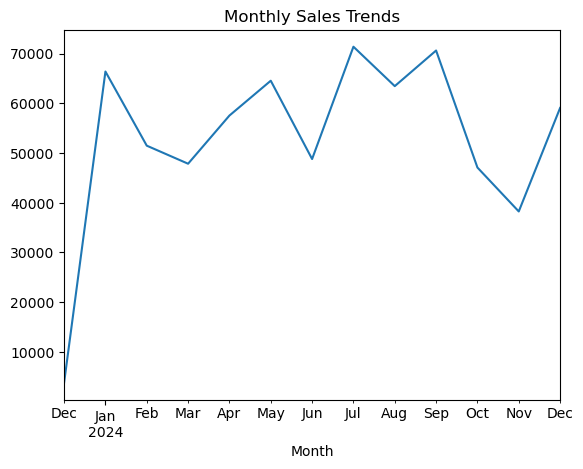

In [12]:
monthly_sales = data.groupby('Month')['TotalValue'].sum()
monthly_sales.plot(title='Monthly Sales Trends')
plt.show()

In [13]:
## 4. Customer Behavior

In [14]:
avg_transaction_value = data['TotalValue'].mean()
print("Average Transaction Value: $", round(avg_transaction_value, 2))

Average Transaction Value: $ 690.0


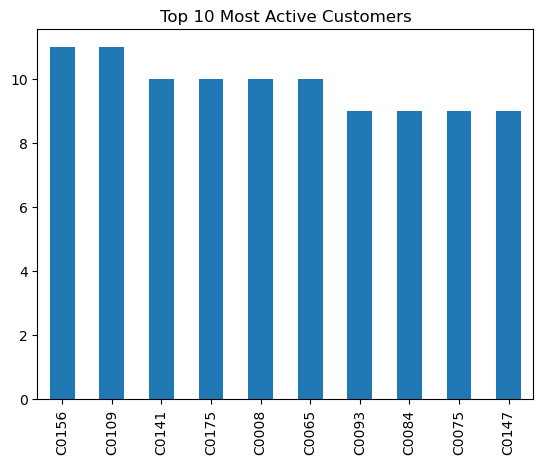

In [15]:
active_customers = data['CustomerID'].value_counts().head(10)
active_customers.plot(kind='bar', title='Top 10 Most Active Customers')
plt.show()

In [16]:
## 5. Time-Based Insights

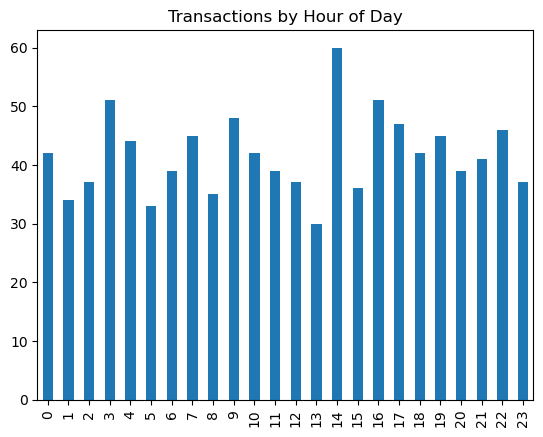

In [17]:
data['Hour'].value_counts().sort_index().plot(kind='bar', title='Transactions by Hour of Day')
plt.show()

In [18]:
data.to_csv('Merged_Dataset.csv', index=False)